#SESSION 9: SOCIAL NETWORK ANALYSIS - DESIGN QUALITY OF MULTIPLEX GRAPH

## Step 1: Import Modules

In [1]:
#ALGORITHM TO COMPUTE DESIGN QUALITY INDEX ON MULTI-PLEX GRAPH 
#Phanish Puranam & Julien Clement, 2017
#Ver2.1

import numpy as np
import networkx as nx
from xlrd import open_workbook
import matplotlib.pyplot as plt
import itertools

plt.rcParams['figure.dpi'] = 125

## Step 2: Upload the data file

In [3]:
##set the path to your data CSV file (Database.csv) and acces your data
path = "/davinci-1/work/crp/s3_network_chimera.csv" # Use this when using Spyder, running with F5 and the csv file is in the same folder as the script (py)
# create pandas df (I.E. dataframe) to store data, set the type of separator used in your CSV file
df = pd.read_csv(path, sep = ",")
print("Data Imported")

NameError: ignored

## Step 3: Transform existing data into "clean" matrixes

In [ ]:
# Realized structure (who talks with who?)
# Select the file
filename = "s3_network_chimera.xls"
wb = open_workbook(filename)
#get one sheet of the excel file
s = wb.sheet_by_index(0)

##in the file it is 'communication structure'
social_data = []
for row in range(s.nrows):
    row_list = []
    for col in range(s.ncols):
        row_list.append(s.cell(row,col).value)
    social_data.append(row_list)

##creates names label
names_list = [x for x in social_data[0][1:]]
name_labels={}
for i in range(len(names_list)):
    name_labels[i] = names_list[i]  ##dictionary that looks like this {0: 'Anne', 1: 'Bob', 2: 'Charlie'..

##tranforms original matrix (fill in 0)
social_data = [[x for x in row[1:]] for row in social_data[1:]]
for i in range(len(social_data)):
    for j in range(len(social_data[i])):
        if social_data[i][j] == '':
            social_data[i][j] = 0
##transforms existing data into symmetric matrix
        elif social_data[i][j] == 1:
            social_data[j][i] = 1   
social_structure = np.array(social_data)

M = len(social_structure)


# Authority structure (who has an authority relation with who?)
#filename ="s3_network_chimera.xlsx"
#wb = open_workbook(filename)
s = wb.sheet_by_index(1)

authority_data = []
for row in range(s.nrows):
    row_list = []
    for col in range(s.ncols):
        row_list.append(s.cell(row,col).value)
    authority_data.append(row_list)

##tranforms original matrix (fill in 0)
authority_data = [[x for x in row[1:]] for row in authority_data[1:]]
for i in range(len(authority_data)):
    for j in range(len(authority_data[i])):
        if authority_data[i][j] == '':
            authority_data[i][j] = 0

authority_structure = np.array(authority_data)


# Common-boss network (who has a boss in common?)
##creates an empty matrix
common_boss_structure = np.zeros((M,M))
for row in authority_structure:
    ##isolate subordinates
    subordinates = [i for i, x in enumerate(row) if x == 1]
    ##creates all possible combination between subordinates 
    ##and define that tie = 1
    for tie in itertools.combinations(subordinates, 2):
        common_boss_structure[tie[0]][tie[1]] = 1
        common_boss_structure[tie[1]][tie[0]] = 1
        
# Task structure 
#filename ="s3_network_chimera.xlsx"
#wb = open_workbook(filename)
s = wb.sheet_by_index(2)

task_data = []
for row in range(s.nrows):
    row_list = []
    for col in range(s.ncols):
        row_list.append(s.cell(row,col).value)
    task_data.append(row_list)

task_data = [[x for x in row[1:]] for row in task_data[1:]]
for i in range(len(task_data)):
    for j in range(len(task_data[i])):
        if task_data[i][j] == '':
            task_data[i][j] = 0
        elif task_data[i][j] == 1:
            task_data[j][i] = 1
task_structure = np.array(task_data)


print ("Ready to plot!")

## Step 4: Plot the network graphs

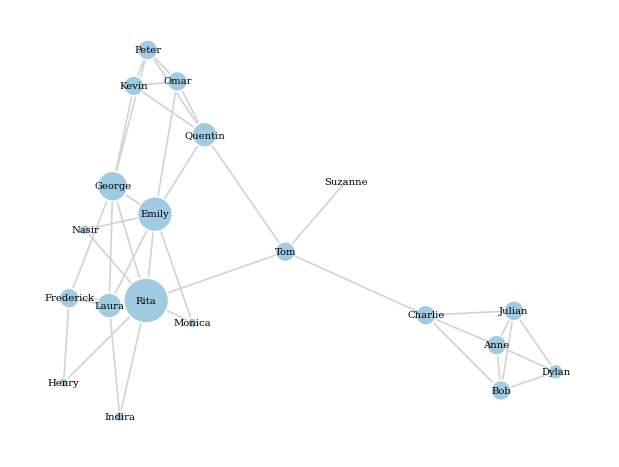

In [ ]:
# Task structure measures

# Degree centrality in task structure
G = nx.from_numpy_array(task_structure)
degrees = nx.degree(G)
#degrees_list = [degrees[x]+5 for x in range(len(degrees))]
pos=nx.spring_layout(G)#, k=0.15)
#colors=range(G.number_of_edges(u=None, v=None))
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color='#A0CBE2',
                                  #cmap=plt.cm.coolwarm,
                                  node_size=[(sum(task_structure[v])*3)**2 for v in range(len(degrees))],
                                  label=None)
nodes.set_edgecolor('white')
edges = nx.draw_networkx_edges(G, pos,
           edge_color='#d3d3d3',
           width=1)
labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)
plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "task.png", dpi=400)
plt.show()

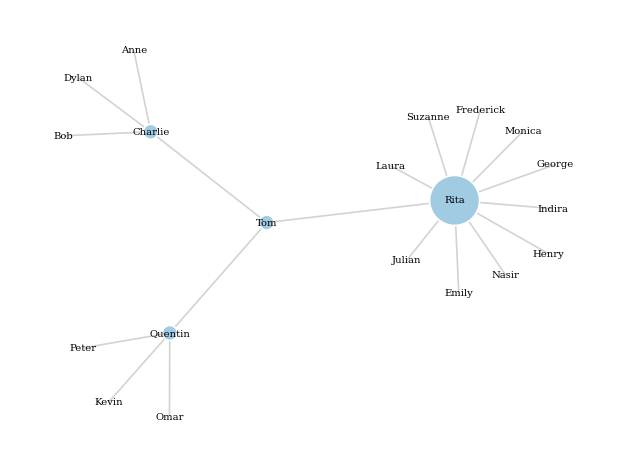

In [ ]:
# Authority structure
# Degree
G = nx.from_numpy_array(authority_structure)
degrees = nx.degree(G)
##adapt size of each nodes according to degree (number of authority edges a node has)
#degrees_list = [degrees[x]+5 for x in range(len(degrees))]
##define position of each node through spring algorithm (otherwise node may look cluttered)
pos=nx.spring_layout(G, k=0.15)
#colors=range(G.number_of_edges(u=None, v=None))

nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color='#A0CBE2',
                                  #cmap=plt.cm.coolwarm,
                                  node_size=[(sum(authority_structure[v])*3)**2 for v in range(len(degrees))],
                                  label=None)
nodes.set_edgecolor('white')
edges = nx.draw_networkx_edges(G, pos,
           edge_color='#d3d3d3',
           width=1)
labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)
#plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "authority.png", dpi=400)
plt.show()

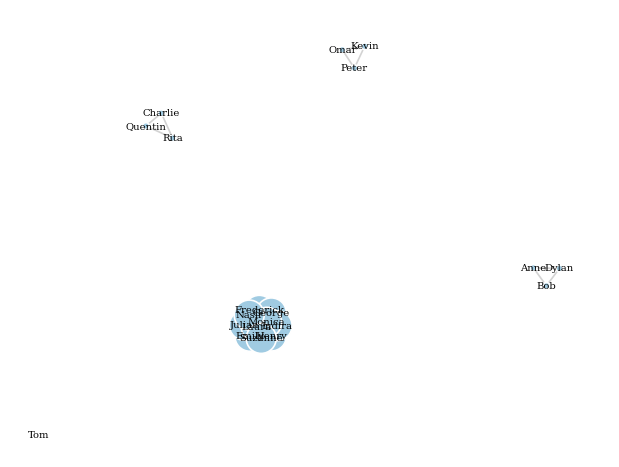

In [ ]:
# Degree centrality in common boss structure
G = nx.from_numpy_array(common_boss_structure)
degrees = nx.degree(G)
degrees_list = [degrees[x]+5 for x in range(len(degrees))]
pos=nx.spring_layout(G)
#colors=range(G.number_of_edges(u=None, v=None))
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color='#A0CBE2',
                                  #cmap=plt.cm.coolwarm,
                                  node_size=[(sum(common_boss_structure[v])*2)**2 for v in range(len(degrees))],
                                  label=None)
nodes.set_edgecolor('white')
edges = nx.draw_networkx_edges(G, pos,
           edge_color='#d3d3d3',
           width=1)
labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)
plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "common_boss.png", dpi=400)
plt.show()

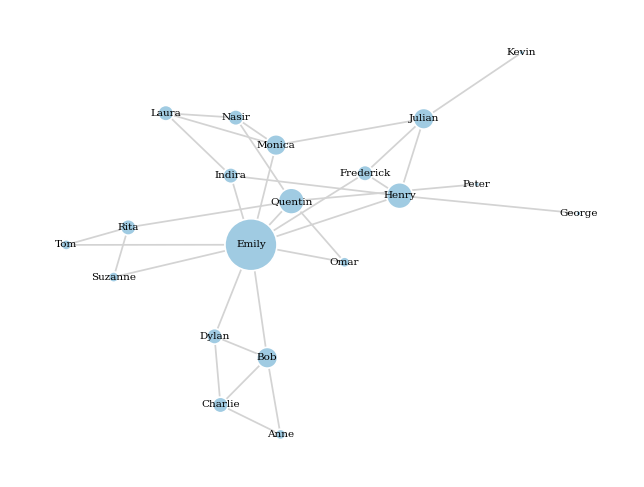

In [ ]:
# Social structure measures

# Degree Centrality
G = nx.from_numpy_array(social_structure)
degrees = nx.degree(G)

degrees_list = [degrees[x]+5 for x in range(len(degrees))]
pos=nx.spring_layout(G, k=0.15)
colors=range(G.number_of_edges(u=None, v=None))
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color='#A0CBE2',
                                  #cmap=plt.cm.coolwarm,
                                  node_size=[(sum(social_structure[v])*3)**2 for v in range(len(degrees))],
                                  label=None)
nodes.set_edgecolor('white')
edges = nx.draw_networkx_edges(G, pos,
           edge_color='#d3d3d3',
           width=1)
labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)
#plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "communication_degree.png", dpi=400)
plt.show()

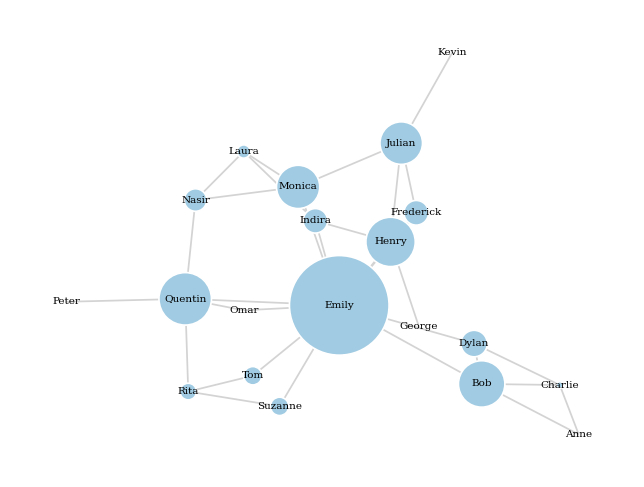

In [ ]:
# Betweenness Centrality
G = nx.from_numpy_array(social_structure)
betweens = nx.betweenness_centrality(G)

#betweens_list = [betweens[x]+5 for x in range(len(betweens))]
pos=nx.spring_layout(G, k=0.15)
#colors=range(G.number_of_edges(u=None, v=None))
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color='#A0CBE2',
                                  #cmap=plt.cm.coolwarm,
                                  node_size=[v*5000 for v in betweens.values()],
                                  label=None)
nodes.set_edgecolor('white')
edges = nx.draw_networkx_edges(G, pos,
           edge_color='#d3d3d3',
           width=1)
labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)
#plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "communication_betweenness.png", dpi=400)
plt.show()

## Step 5: Identify omission and commission errors in organizational design 

What next code is doing in creating match_matrix:

*  Multiplies by 2 each cell of the original task structure (set value 2 for edges that have task interdependence)
* Subtracts by 1 if the value of (original) task structure (0 or 1) is different than a boolean that is 1(True) if  the sum of social, authority and common boss > 0 or 0(False) if the sum of them is ==0

If there is a task interdependence tie and it is "covered" by a social, authority or common boss tie the cell takes value 2

If there is no task interdependence tie and it is correctly "not covered" by a social, authority or common boss tie the cell takes value 0

If there is an omission error, the cell would be 1 

If there is a commission error the cell would be -1

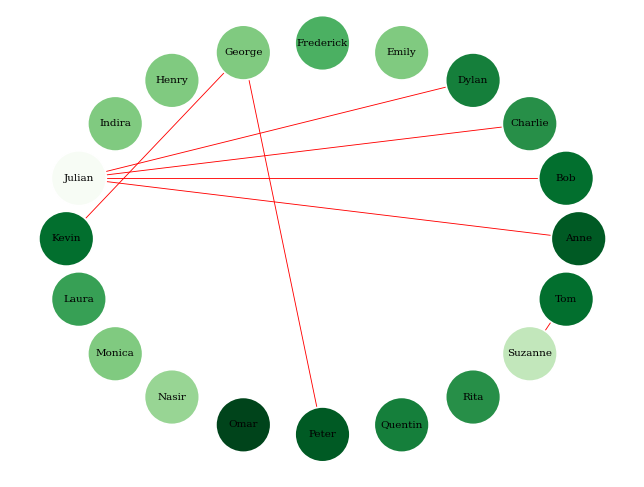

Omission Errors: Missing links



In [ ]:
##make authority data symmetric
for i in range(len(authority_data)):
    for j in range(len(authority_data[i])):
        if authority_data[i][j] == '':
            authority_data[i][j] = 0
        elif authority_data[i][j] == 1:
            authority_data[j][i] = 1
authority_structure = np.array(authority_data)


# Match between task structure and formal+realized social structure
match_matrix = task_structure*2 - (task_structure!= ((authority_structure+social_structure+common_boss_structure)>0))
np.fill_diagonal(match_matrix, 0)

##creates two empty matrixes of the size correspondent to number of employees
omission_matrix=np.zeros((M,M))
comission_matrix=np.zeros((M,M))

##populates omission matrix
for i in range(M):
    for j in range(M):
        if match_matrix[i,j]==1:
            omission_matrix[i,j]=1

##populates commission matrix
for i in range(M):
    for j in range(M):
        if match_matrix[i,j]==-1:
            comission_matrix[i,j]=1

##visualize omission matrix
G = nx.from_numpy_array(omission_matrix, create_using=None)
##set a circular layout visualization
pos=nx.circular_layout(G)
##select a subset of edges
eom=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] ==1]

nx.draw_networkx_edges(G,pos,
                       edgelist=eom,
                       width=0.5,
                       edge_color='red')

##measures the amount of ties for each node that are correct and colors it accordingly
node_weights = [len([x for x in y if x%2==0])-1 for y in match_matrix]
node_weights = [x/(len(match_matrix)-1) for x in node_weights]
# to save, change sixe to 500 and label fontsize to 4
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color=node_weights,
                                  cmap='Greens',#plt.cm.RdYlBu,
                                  node_size=1000,
                                  label=None)
nodes.set_edgecolor('white')

labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)

plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "task_match.png", dpi=400)
plt.show()
print ("Omission Errors: Missing links")
print()

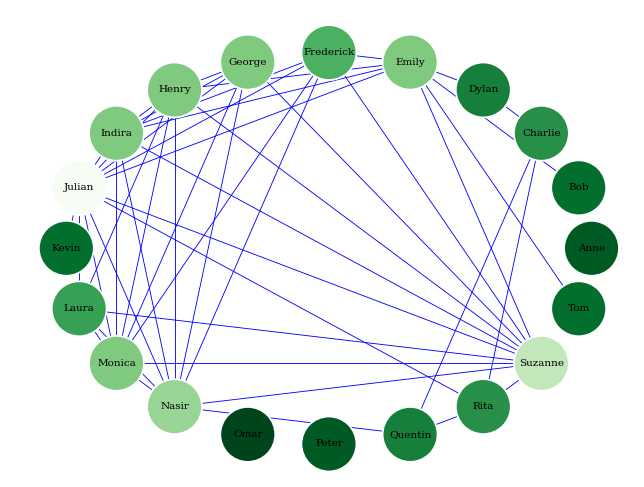

Commission Errors: Surplus links



In [ ]:
G = nx.from_numpy_array(comission_matrix, create_using=None)
pos=nx.circular_layout(G)
ecomm=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] ==1]

nx.draw_networkx_edges(G,pos,
                       edgelist=ecomm,
                       width=0.5,
                       edge_color='blue')

##measures the amount of ties for each node that are correct and colors it accordingly
node_weights = [len([x for x in y if x%2==0])-1 for y in match_matrix]
node_weights = [x/(len(match_matrix)-1) for x in node_weights]
# to save, change sixe to 500 and label fontsize to 4
nodes = nx.draw_networkx_nodes(G, pos,
                                  node_color=node_weights,
                                  cmap='Greens',
                                  node_size=1000,
                                  label=None)
nodes.set_edgecolor('white')

labels = nx.draw_networkx_labels(G, pos, font_size=6, font_color='k', font_family='serif', font_weight='normal', alpha=1.0, labels=name_labels, ax=None)

plt.grid(False)
plt.axis('off')
#plt.savefig(folder + "task_match.png", dpi=400)
plt.show()
print ("Commission Errors: Surplus links")
print ()


##Step 6: Compute Design Quality Index

In [ ]:
## Computing Design Quality Index

omm=1 # Cost of omission error
comm=0.5 #Cost of commission error
##correct cells +1, omission errors cells -1, commission error cells (-0.5)##
performance = (np.sum(match_matrix==2) + np.sum(match_matrix==0)-comm*np.sum(match_matrix==-1)-omm*np.sum(match_matrix==1))/float(M**2)
print
print("#################################################################################")
print("Design quality is computed by superposing interdependence with influence matrices")
print("Weight on omission error is= " + str(omm))
print("Weight on comission error is= " + str(comm))
print
print("For current data, design quality index is " + str(performance))
print("#################################################################################")



#################################################################################
Design quality is computed by superposing interdependence with influence matrices
Weight on omission error is= 1
Weight on comission error is= 0.5
For current data, design quality index is 0.5775
#################################################################################
